# Chapter 2 Summarizing and Visualizing Data
# Use Case: Data Exploration; Industry Groups Valuations 
# ===========================================

Dataset: Industry vital stats


First we load the packages we will use

In [4]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# package for navigating the operating system
import os

Load in CSV data: Let us start by loading all the data


In [5]:
loc = "../data/valuation multiples.xlsx"
start_time = time.time()
df = pd.read_excel(loc, engine='openpyxl')
print("It took %s seconds to load the .xlsx file." % (time.time() - start_time))

It took 0.05504012107849121 seconds to load the .xlsx file.


Examine our data

In [6]:
df

,Industry Name,Number of firms,Market Cap ($ millions),Book Equity ($ millions),Enteprise Value ($ millions),Invested Capital ($ millions),Total Debt (including leases) ($ millions),Revenues ($ millions),Gross Profit ($ millions),EBITDA ($ millions),EBIT (Operating Income) ($ millions),Net Income ( $ millions)
0,Advertising,61,37043.59,3751.89,58365.88,7968.60,28709.23,31929.26,7658.73,5903.24,3302.20,110.05
1,Aerospace/Defense,72,621095.05,112721.59,777382.42,138310.87,205267.16,386417.61,68032.88,46489.24,29227.66,9630.02
2,Air Transport,17,97074.29,54971.13,203713.82,114847.27,156638.34,103261.18,5554.66,-4237.00,-19996.50,-25851.19
3,Apparel,51,94360.52,28315.62,119176.27,38493.86,37167.73,58827.97,29276.74,8050.05,3485.69,-2318.51
4,Auto & Truck,19,787476.54,90672.11,1040421.44,354753.30,304482.67,290390.13,26245.22,22371.36,5790.54,4069.84
...,...,...,...,...,...,...,...,...,...,...,...,...
89,Transportation,21,262720.24,35456.52,323980.01,82013.02,83266.92,208115.50,41445.78,24985.34,12638.11,8072.71
90,Transportation (Railroads),6,289175.22,49986.90,346853.39,107339.07,65182.17,42821.70,22935.80,22438.20,16568.11,10734.50
91,Trucking,35,187610.07,45429.66,236614.65,78368.29,63332.24,86696.32,18896.51,6018.46,-2215.73,-8039.07
92,Utility (General),16,289495.40,138319.50,498600.26,337728.26,216233.03,120533.20,49156.00,41030.83,24287.04,10354.20


We now calculate several financial analytics to help us understand industry performance (EBITDA_margin, Net_Margin), capital structure (Debt_EV) and valuation (EBITDA_EV, .

In [7]:
#Calculate financial analytics
df.insert(df.shape[1],'EBITDA_margin', df['EBITDA ($ millions)']/df['Revenues ($ millions)'])
df.insert(df.shape[1],'Net_Margin', df['Net Income ( $ millions)']/df['Revenues ($ millions)'])
df.insert(df.shape[1],'Debt_EV', df['Total Debt (including leases) ($ millions)']/df['Enteprise Value ($ millions)'])
df.insert(df.shape[1],'EBITDA_EV', df['EBITDA ($ millions)']/df['Enteprise Value ($ millions)'])
df.insert(df.shape[1],'EBITDA_Multiple', df['EBITDA ($ millions)']/df['Enteprise Value ($ millions)'])

key_dis = ['EBITDA_Multiple','EBITDA_margin','Net_Margin','Debt_EV','EBITDA_EV','Gross Profit ($ millions)']
df_key_dis = df[key_dis]

Data exploration, pairplot of all our columns

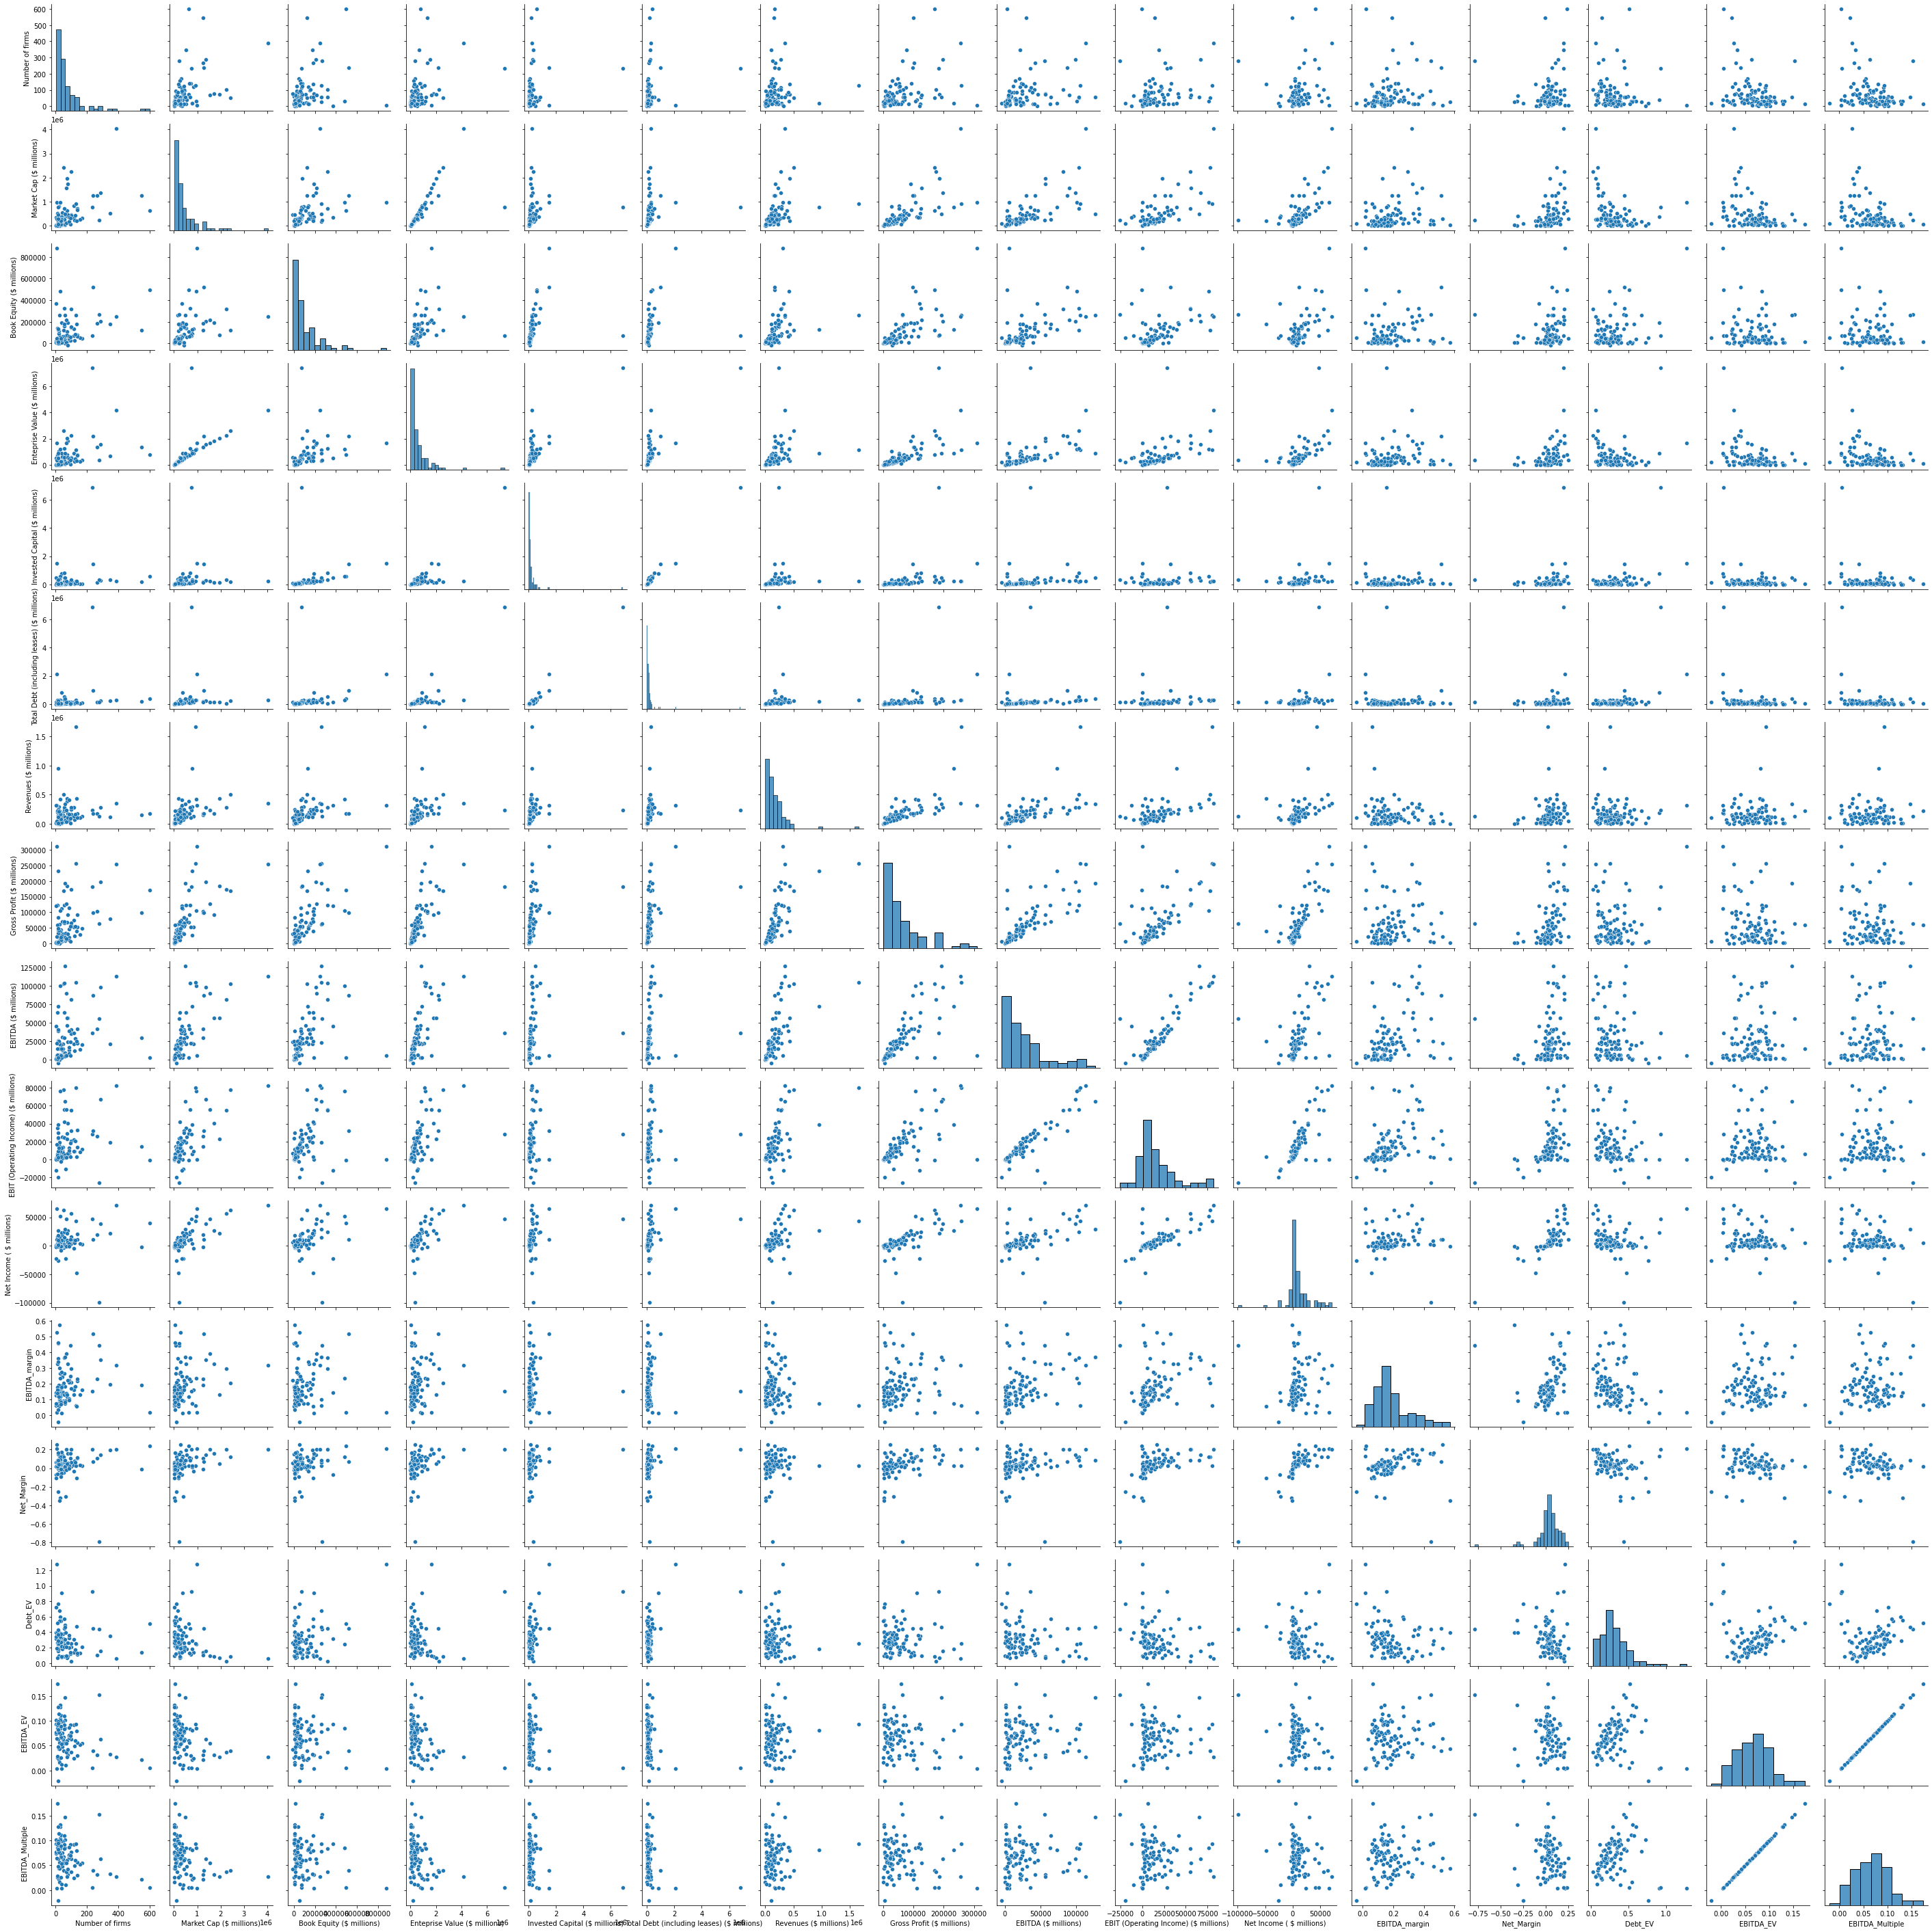

In [8]:
sns.pairplot(df)

We examine these pairwise plots and then zone in on the most interesting items... a qualitative process. In this case we pick out some of our analytics.

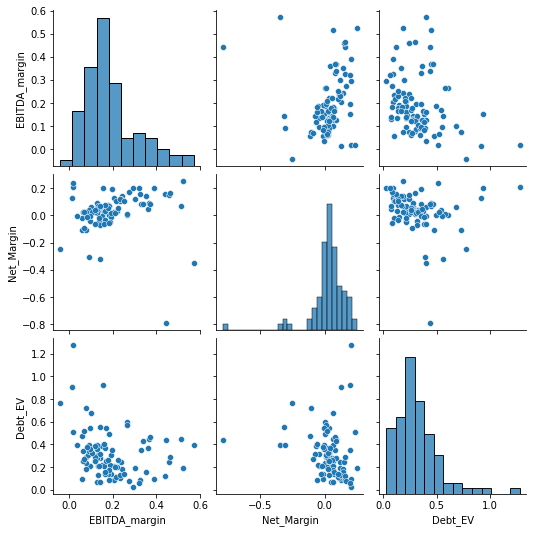

In [9]:
#Explore data ... pairwise plots
sns.pairplot(df_key_dis[['EBITDA_margin','Net_Margin','Debt_EV']]) #, kind="scatter", hue='Market Cap ($ millions)') #,plot_kws=dict(s=10, edgecolor="white", linewidth=2.5))

Explore further... Examine correlations between our columns...

In [10]:
#Correlation matrix
# calculate the correlation matrix
corr = df.corr()
corr

,Number of firms,Market Cap ($ millions),Book Equity ($ millions),Enteprise Value ($ millions),Invested Capital ($ millions),Total Debt (including leases) ($ millions),Revenues ($ millions),Gross Profit ($ millions),EBITDA ($ millions),EBIT (Operating Income) ($ millions),Net Income ( $ millions),EBITDA_margin,Net_Margin,Debt_EV,EBITDA_EV,EBITDA_Multiple
Number of firms,1.000000,0.450187,0.342222,0.413270,0.221021,0.192198,0.121226,0.392667,0.251103,0.193058,0.159160,0.098921,0.093039,-0.110354,-0.292163,-0.292163
Market Cap ($ millions),0.450187,1.000000,0.460562,0.716766,0.162452,0.153092,0.410239,0.721723,0.707577,0.700598,0.637382,0.229252,0.339418,-0.275450,-0.357469,-0.357469
Book Equity ($ millions),0.342222,0.460562,1.000000,0.385524,0.286838,0.263900,0.392626,0.714845,0.508303,0.366289,0.413151,0.097462,0.192855,0.326271,-0.169066,-0.169066
Enteprise Value ($ millions),0.413270,0.716766,0.385524,1.000000,0.795125,0.785048,0.327823,0.668079,0.538756,0.534282,0.572979,0.152008,0.324491,0.102965,-0.371101,-0.371101
Invested Capital ($ millions),0.221021,0.162452,0.286838,0.795125,1.000000,0.988410,0.125110,0.380992,0.172310,0.148600,0.285474,0.018936,0.180563,0.450735,-0.229342,-0.229342
Total Debt (including leases) ($ millions),0.192198,0.153092,0.263900,0.785048,0.988410,1.000000,0.121782,0.390533,0.118525,0.118749,0.304275,-0.029556,0.189724,0.482709,-0.256398,-0.256398
Revenues ($ millions),0.121226,0.410239,0.392626,0.327823,0.125110,0.121782,1.000000,0.708192,0.633470,0.600718,0.382626,-0.145911,0.114954,-0.030299,0.051046,0.051046
Gross Profit ($ millions),0.392667,0.721723,0.714845,0.668079,0.380992,0.390533,0.708192,1.000000,0.733149,0.666488,0.667777,0.057116,0.339316,0.124448,-0.169084,-0.169084
EBITDA ($ millions),0.251103,0.707577,0.508303,0.538756,0.172310,0.118525,0.633470,0.733149,1.000000,0.892569,0.504391,0.403386,0.224507,-0.204524,0.107585,0.107585
EBIT (Operating Income) ($ millions),0.193058,0.700598,0.366289,0.534282,0.148600,0.118749,0.600718,0.666488,0.892569,1.000000,0.744589,0.327645,0.487985,-0.273234,0.034571,0.034571


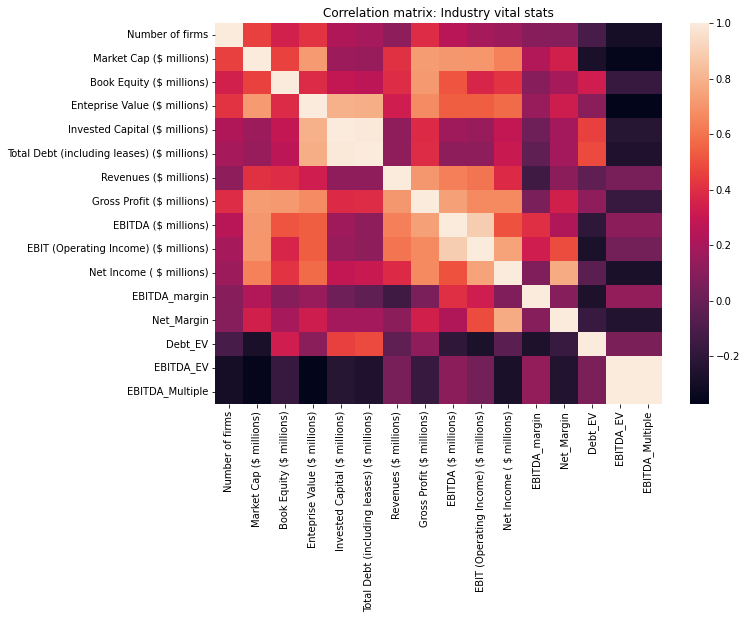

In [11]:
#Correlatiion matrix heat map
plt.figure(figsize=(10,7))
plt.title('Correlation matrix: Industry vital stats')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# show plot
plt.show()


We are now going to examine EBITDA_Multiple. To make things simple create a working dataframe of industry name and EBITDA_Multiplier

In [12]:
# Get cutdown dataframe of EBITDA multiples by industry we cna now work from...
EBITDA_multiple = pd.DataFrame(df['EBITDA_Multiple'])
# Note that sometimes we might need to work form column numbers rather than names, here we add the column "Industry  Name" using iloc 
df_EBITDA_mul =  pd.concat([df.iloc[:,0],EBITDA_multiple], axis=1)
df_EBITDA_mul.columns = ['Industry Name', 'EBITDA_Multiple']

In [13]:
df_EBITDA_mul

,Industry Name,EBITDA_Multiple
0,Advertising,0.101142
1,Aerospace/Defense,0.059802
2,Air Transport,-0.020799
3,Apparel,0.067547
4,Auto & Truck,0.021502
...,...,...
89,Transportation,0.077120
90,Transportation (Railroads),0.064691
91,Trucking,0.025436
92,Utility (General),0.082292


Remove outliers below the 10th and all values above the 70th percentile, to make it easier to read and chart

In [33]:
df_EBITDA_mul = df_EBITDA_mul[(df['EBITDA_Multiple'] > df_EBITDA_mul['EBITDA_Multiple'].quantile(0.10)) & (df_EBITDA_mul['EBITDA_Multiple']  < df['EBITDA_Multiple'].quantile(0.70))]
df_EBITDA_mul

,Industry Name,EBITDA_Multiple
1,Aerospace/Defense,0.059802
3,Apparel,0.067547
5,Auto Parts,0.058946
8,Beverage (Alcoholic),0.056692
9,Beverage (Soft),0.048067
12,Building Materials,0.075151
13,Business & Consumer Services,0.054428
16,Chemical (Diversified),0.074601
17,Chemical (Specialty),0.063360
20,Computers/Peripherals,0.040035


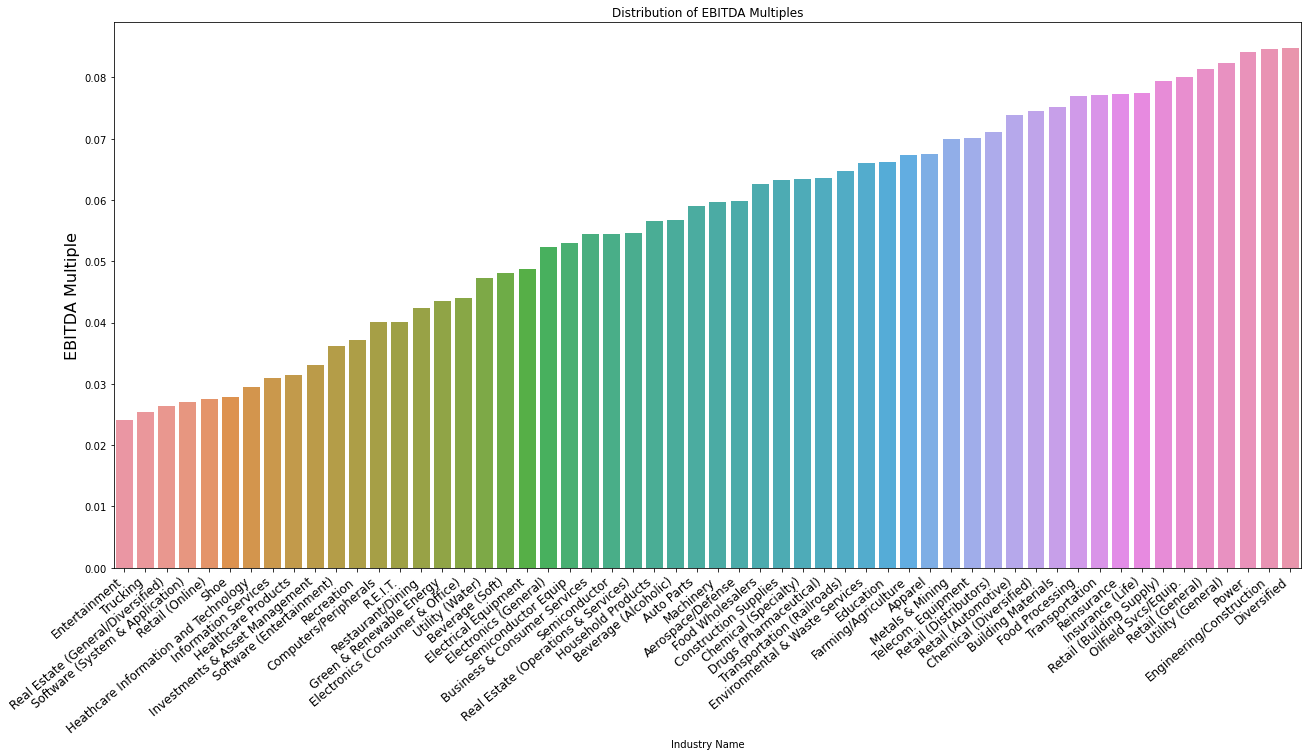

In [34]:
#Column chart with sorted EBITDA multiples

plt.figure(figsize=(18,10))

#Chart data, note that the dataframe is sorted by 'EBITDA Multiple' before charting!
ax = sns.barplot(x = 'Industry Name', y = 'EBITDA_Multiple', data = df_EBITDA_mul, dodge = False,
            order=df_EBITDA_mul.sort_values('EBITDA_Multiple')['Industry Name'])


#Labels rotated and with a tight layout so as we can read them....
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#Label and title the chart...
plt.ylabel('EBITDA Multiple', fontsize=16)
plt.xticks(fontsize=12)
plt.title('Distribution of EBITDA Multiples')

# show plot
plt.show()

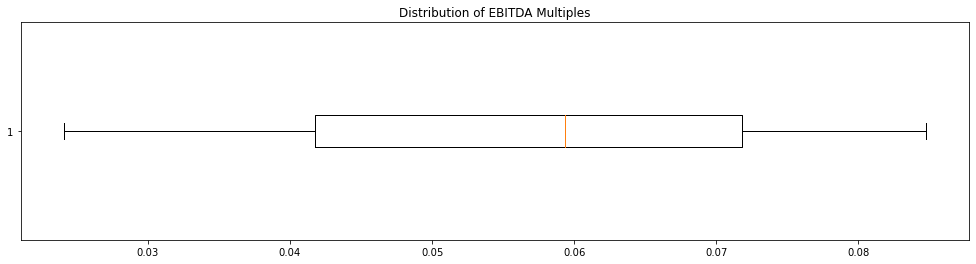

In [36]:
# Create box plot, orientate horizontally....
plt.figure(figsize=(17,4))
plt.boxplot(df_EBITDA_mul['EBITDA_Multiple'], vert=False)

#Label and title
plt.title('Distribution of EBITDA Multiples')

# show plot
plt.show()

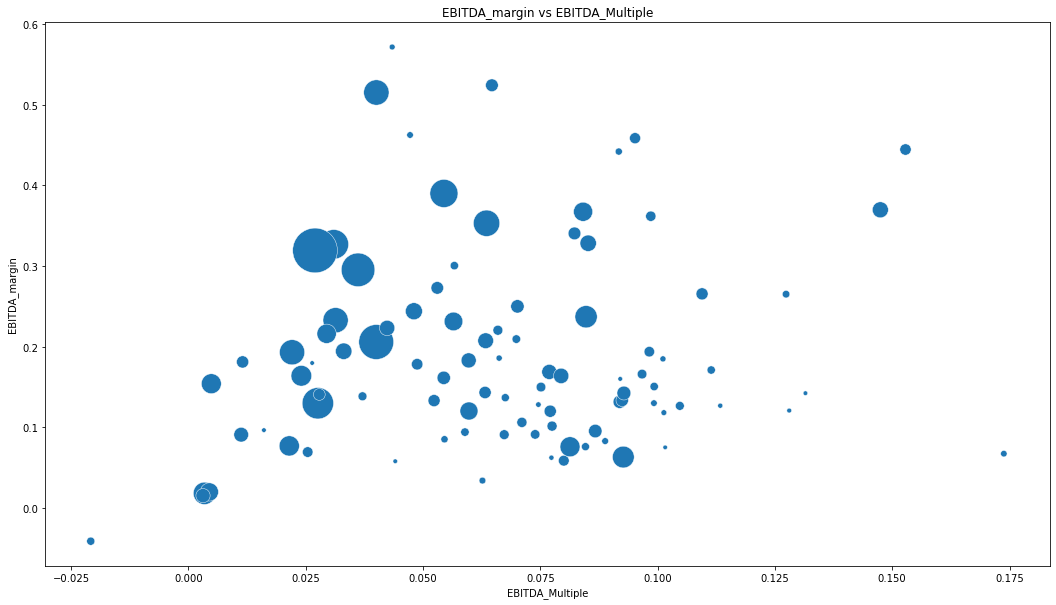

In [38]:
from gapminder import gapminder # data set

#Label and title
plt.figure(figsize=(18,10))
plt.title('EBITDA_margin vs EBITDA_Multiple')

# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="EBITDA_Multiple", y="EBITDA_margin", size="Market Cap ($ millions)", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

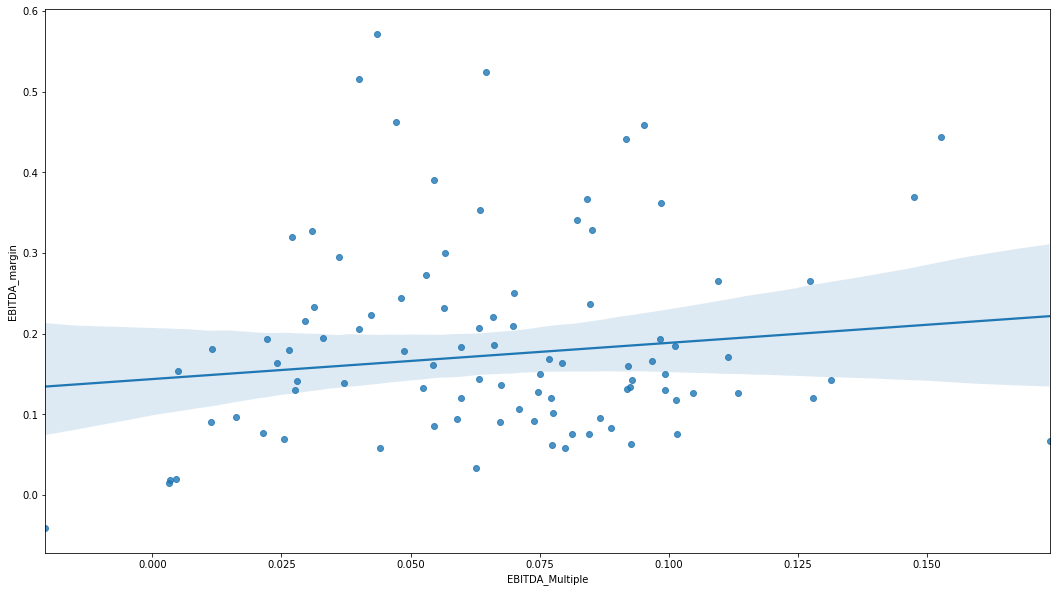

In [39]:
#Interpolate

plt.figure(figsize=(18,10))

# use the scatterplot function to build the bubble map
sns.regplot(data=df_key_dis, x="EBITDA_Multiple", y="EBITDA_margin", robust=True)


# show the graph
plt.show()

In [40]:
df[df.columns[0]]

0                    Advertising
1              Aerospace/Defense
2                  Air Transport
3                        Apparel
4                   Auto & Truck
                 ...            
89                Transportation
90    Transportation (Railroads)
91                      Trucking
92             Utility (General)
93               Utility (Water)
Name: Industry  Name, Length: 94, dtype: object

Finally let us compare all industries using three metrics: 'EBITDA_margin', 'EBITDA_EV', 'Net_Margin'. We can use a clustering approach to get an idea of which industries are more similar with respect to these columns.

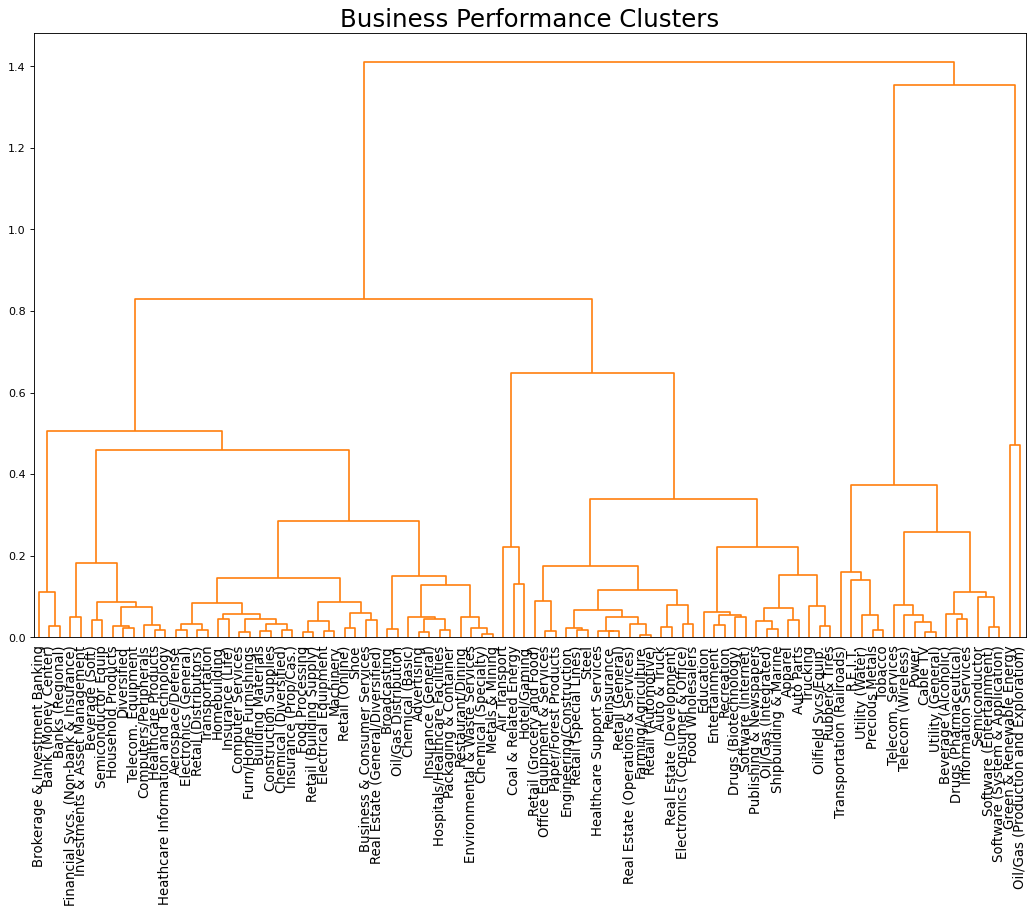

In [41]:
#Clustering
import scipy.cluster.hierarchy as shc

#Labels
df_lbs = [x for x in df[df.columns[0]]]

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("Business Performance Clusters", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['EBITDA_margin', 'EBITDA_EV', 'Net_Margin']], method='ward'), labels=df_lbs, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()